# EDA wasn't used this time as it was done on same dataset in previous assignment

# Random Forest 
Random forest is an ensemble and supervised  machine learning algorithm which is capable of performing both regression and classification problems.
Ensemble learning: To form a strong prediction model we  join different or same types of algorithms multiple time. 
Random forest consists of many decision trees. It is kind of forming forest of trees. Means random forest combine multiple same type of decision tree algorithm to form a random forest algorithm.

### How Random Forest works
1. Select N number of samples from datasets.
2. Build Decision for each sample and predict the result for each decision tree.
3. Voting is done for each predicted result of decision tree.
4. The prediction result with majority votes win. 

### Iris Dataset 
Iris is a family of flower which contains three type of flower called setosa ,versicolor ,virginica .

Given some features of a flower, and based on these features we have to identify which flower belongs to which category.

This type of problems belong to classification  problems. We can solve this by using supervised machine learning classification algorithm.

In [146]:
#importing required libraries 

import numpy as np 

import pandas as pd 

import sklearn

import time

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import accuracy_score 

from sklearn.datasets import load_iris

import sklearn.metrics as metrics

import pandas as pd

from sklearn.metrics import confusion_matrix

In [147]:

#Loading datasets 

iris_data = load_iris() 

iris=pd.DataFrame(iris_data.data)

#shape of datasets 

print ("Dataset Shape: ", iris.shape) 



Dataset Shape:  (150, 4)


the shape of data is (150, 4) which means we have 150 samples (rows) and 4 features (columns).

In [148]:
#first five sample 


iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [149]:

 # printing categories (setosa, versicolor,virginica)

print(iris_data.target_names)

# printing features of flower 

print(iris_data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


 4 features are : sepal length , sepal width, petal length , petal width. The features have some values (150 sample) based on that flowers classified in three category that is setosa,  versicolor and virginica  (0,1 and 2).

In [150]:

#printing samples and target 

X = iris.values[:, 0:4] 

Y = iris_data.target

print(X[0:5])

print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [151]:

# Splitting the dataset into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

Training data is used to train the model and testing data is used to check the performance of model.

In [152]:
#defining random forest classifier 

clfr= RandomForestClassifier(random_state = 100)


In [153]:
# Performing training 


clfr.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

##### Parameters in classifier 

n_estimators - This parameter defines the number of trees in the random forest. 

criterion gini - We have already discuss it in decision tree. To make a split in tree we need to calculate impurities that can be entropy and gini. In python sklearn by default gini is calculated.  (In short to make a decision in decision tree we have to calculate gini index and then join together these trees form random forest).

Random State- Random state can be any integer. The reason behind defining random state parameters is to initialize a random number generator which ensures that the splits that you generate are reproducible. 

In [154]:

#making predictions 

Y_pred=clfr.predict(X_test)

Y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [155]:
#Accuray of the model 

print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

cm=np.array(confusion_matrix(y_test,Y_pred))

cm

Accuracy: 0.9555555555555556


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]], dtype=int64)

##### Parameters in classifier 

n_estimators - This parameter defines the number of trees in the random forest. 

criterion gini - We have already discuss it in decision tree. To make a split in tree we need to calculate impurities that can be entropy and gini. In python sklearn by default gini is calculated.  (In short to make a decision in decision tree we have to calculate gini index and then join together these trees form random forest).

Random State- Random state can be any integer. The reason behind defining random state parameters is to initialize a random number generator which ensures that the splits that you generate are reproducible. 

In [156]:
# Using different values of n_estimators as paramter for classifier

In [157]:
estimator_values=[1,2,3,4,5, 20,60,100,150]
accuracies=[]
time_taken=[]

In [158]:
# random_state kept constant to get fair comparison between changine n_estimators value

for e_v in estimator_values:
    a=time.time()
    clfr= RandomForestClassifier(random_state = 100, n_estimators=e_v)
    clfr.fit(X_train, y_train)
    b=time.time()
    Y_pred=clfr.predict(X_test)
    accuracy=metrics.accuracy_score(y_test, Y_pred)
    
    accuracies.append(accuracy)
    time_taken.append(b-a)
    

In [159]:
import matplotlib.pyplot as plt

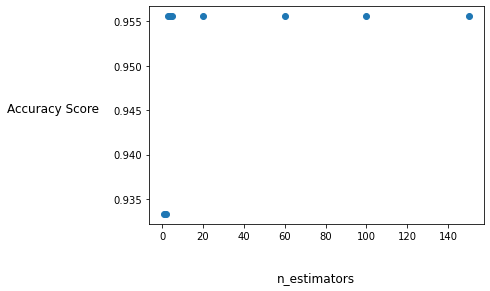

In [160]:
plt.scatter(estimator_values,accuracies)
plt.xlabel("n_estimators",fontsize=12,labelpad=30)
plt.ylabel("Accuracy Score",rotation=0, fontsize=12, labelpad=60)

plt.show()

Plot compararision didn't help much, will use tabular representation later 

##### Training Time v/s n_estimator plot

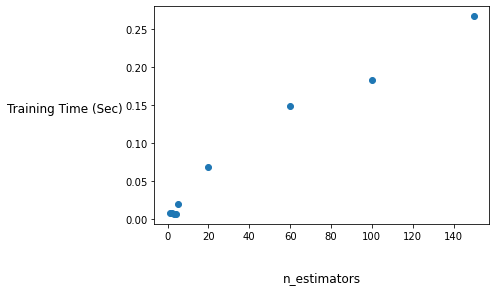

In [161]:
plt.scatter(estimator_values,time_taken)
plt.xlabel("n_estimators",fontsize=12,labelpad=30)
plt.ylabel("Training Time (Sec)",rotation=0, fontsize=12, labelpad=60)

plt.show()

Training Time almost linerally rises with increase in n_estimators

In [162]:
random_forest_data_dic = {"n_estimators":estimator_values, "Accuracy":accuracies, "Time":time_taken}
df = pd.DataFrame(random_forest_data_dic)

In [163]:
df

,n_estimators,Accuracy,Time
0,1,0.933333,0.007509
1,2,0.933333,0.007591
2,3,0.955556,0.006928
3,4,0.955556,0.006850
4,5,0.955556,0.019476
5,20,0.955556,0.068120
6,60,0.955556,0.149412
7,100,0.955556,0.183249
8,150,0.955556,0.267045


#### Accuracy Remained constant after a specific n_estimators value, however there was always linear increase in training time
#### Therefore, n_estimators should be taken with good estimate
In our case, the dataset was very small, that's why n_estimators=3 was optimal value. However, RandomForest is genrally used with larger dataset and this optimal value would be rather high

###### #making prediction on new data

In [164]:
clfr.predict([[3, 5, 4, 2]])

array([2])

### Now  why we need random forest if we have decision tree? 
#### In simple terms for larger data (big data) we need to form a deep decision tree, this may suffer from overfitting. But random forest prevent overfitting by creating trees on random subsets of training sample

# Decision Trees

We know that by definition decision tree is a tree shaped  flowchart-like structure (reversed tree) with nodes (leaf), branches and  decision making conditions. 

Implementing Decision tree on same IRIS dataset...

In [165]:
# We already did almost all the requered imports

from sklearn.tree import DecisionTreeClassifier 

from sklearn import tree

In [166]:

#Loading datasets 

iris_data = load_iris() 

iris=pd.DataFrame(iris_data.data)

#priting features name of iris data 

print ("Features Name : ", iris_data.feature_names) 

#shape of datasets 

print ("Dataset Shape: ", iris.shape) 

#first five sample 

print ("Dataset: ",iris.head())  

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Shape:  (150, 4)
Dataset:       0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [167]:

#priting samples and target 

X = iris.values[:, 0:4] 

Y = iris_data.target

print(X)

print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [168]:

# Splitting the dataset into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [169]:

# Decision tree classifier 

clf= DecisionTreeClassifier(random_state = 100)

#fitting the training data

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In this part of code of Decision Tree on Iris Datasets we defined the decision tree classifier (Basically building a model). And then fit the training data into the classifier to train the model.

Note that we fit both X_train , and y_train (Basically features and target), means model will learn features values to predict the category of flower.

In [170]:
# prediction on random data

X=[[6.4,1.8 ,6.6 ,2.1]]

Y_pred=clf.predict(X)

print(Y_pred)

# prediction on X_test (testing data )

Y_pred=clf.predict(X_test)

print(Y_pred)

[2]
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


Here we used our trained model to make prediction. As you see in the output first we make prediction on random sample (take a iris flower and measure the features of mentioned ) to understand how model work. We put random values (4 feature values) and make prediction, And we get the category 2 means the flower that we have belongs to Verginica category of iris family. 

In [171]:
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

from sklearn.metrics import  confusion_matrix

cm=np.array(confusion_matrix(y_test,Y_pred))

cm

Accuracy: 0.9555555555555556


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]], dtype=int64)

After building model we have to check how our model is performing. To check whether our model is working perfectly for values. 

So, here we can see that we get accuracy 95% which is good. Means our model predict 5% wrong prediction about a category of flower.

Confusion matrix is also a good way to see model's performance. Here out of 150 samples 30% =45 samples we used for testing purpose.

In confusion matrix the positions (0,0) - 16- means 16 flowers of category 0 predicted right.

(1,1)- 10- flowers of category 1 predicted right.

(2,2)-17- flowers of category 2 predicted right. 

(0,0), (1,1) and (2,2) - correct prediction rest wrong prediction. 

conclusion: Diagonal positions of matrix -right prediction , rest-wrong

### Tree Plotting / Decision Making in Decision Tree

[Text(133.92000000000002, 195.696, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.

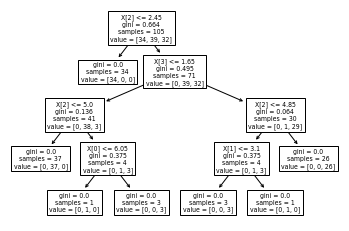

In [172]:

#Tree plotting 

tree.plot_tree(clf)

# (please zoom into the plot!! )

#### In this block of code we created/ plotted a decision tree. This will help us understand how the Decision Tree Classifier works. How are Decisions taken?

#### Basically classification tree is a sequence of question , answer and classification. In the above tree X[2]= petal length means a condition if petal length less than equal to 0.25. If it's True then classify the flower into class 0  (setosa),Because versicolor a particular or pure class it is not further divided and it form a leaf node. 

#### If petal length > 0.25 means there are two possibilities (virginica,versicolor) it form a decision node to make a decision for a leaf node. 

#### We keep doing this until we find a pure leaf node. Leaf nodes cannot be further divided. And thus a decision tree forms. 

#### We can control the depth of the decision tree. 

#### But now the question is how do we decide the classification point or how we make decisions ? (selection criteria)

#### So, basically deciding a good split point is that what we want to know. For this we calculate impurity. We can calculate impurity in several ways. The scikit-learn Decision tree classifier uses gini by default. We can also calculate entropy to calculate impurity. 

## Now, printing text representation of above tree

In [173]:
text_representation = tree.export_text(clf)

print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## Thank YOU!!